[[1.48000000e+02 3.40000000e+02 6.96338952e-01 0.00000000e+00]
 [2.07000000e+02 3.31000000e+02 8.21076453e-01 1.00000000e+00]
 [2.19000000e+02 3.81000000e+02 7.19013155e-01 2.00000000e+00]
 [2.20000000e+02 3.82000000e+02 7.18661785e-01 3.00000000e+00]
 [2.98000000e+02 4.08000000e+02 9.10786808e-01 4.00000000e+00]
 [3.74000000e+02 4.24000000e+02 8.14524472e-01 5.00000000e+00]
 [2.13000000e+02 2.83000000e+02 7.56612301e-01 6.00000000e+00]
 [2.98000000e+02 2.50000000e+02 8.76943052e-01 7.00000000e+00]
 [3.76000000e+02 2.43000000e+02 9.37299788e-01 8.00000000e+00]
 [3.67000000e+02 3.51000000e+02 4.63139802e-01 9.00000000e+00]
 [3.68000000e+02 3.52000000e+02 4.63199228e-01 1.00000000e+01]
 [4.93000000e+02 3.59000000e+02 3.56061906e-01 1.10000000e+01]
 [5.91000000e+02 3.59000000e+02 3.72744530e-01 1.20000000e+01]
 [3.88000000e+02 2.96000000e+02 5.37080586e-01 1.30000000e+01]
 [5.02000000e+02 2.94000000e+02 2.83045024e-01 1.40000000e+01]
 [6.00000000e+02 2.80000000e+02 6.22354448e-01 1.500000

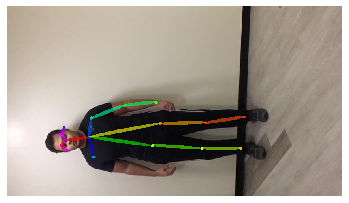

In [1219]:
import sys
sys.path.insert(0, 'python')
import cv2
import model
import util
from hand import Hand
from body import Body
import matplotlib.pyplot as plt
import copy
import numpy as np

body_estimation = Body('model/body_pose_model.pth')
# hand_estimation = Hand('model/hand_pose_model.pth')
test_image = '/Users/amitadate/Work/MSAI/332_Computer_Vision/FRAMES/frame20.jpg'
oriImg = cv2.imread(test_image)  # B,G,R order
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)

plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()


In [353]:
subset

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         7.        ,  8.        ,  9.        , 10.        , 11.        ,
        12.        , 13.        , 14.        , 15.        , 16.        ,
        17.        , 18.        , 19.        , 25.22508839, 18.        ]])

In [357]:
import numpy as np
print(np.shape(canvas))

(1080, 1920, 3)


In [358]:
4032/3024

1.3333333333333333

In [355]:
256*3


768

In [1220]:
import cv2

cv2.imwrite('outimg_frame20.jpg', canvas)
cv2.waitKey();

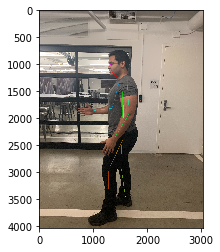

In [9]:
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.show()

In [105]:
candidate[0][0:2]

array([455., 841.])

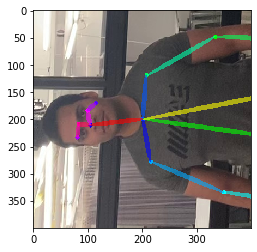

In [102]:
SI(canvas[630:1030,350:750])

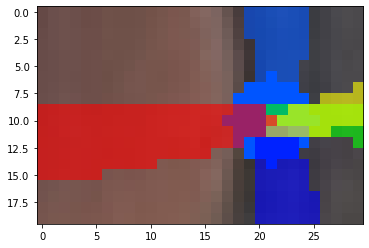

In [103]:
SI(canvas[820:840,530:560])

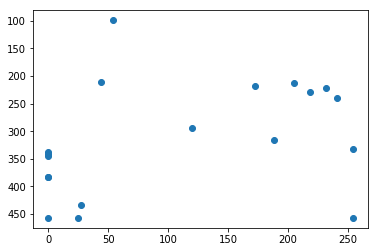

In [35]:
# x and y coordinates of each subset. 
# subset: n*20 array, 0-17 is the index in candidate, 18 is the total score, 19 is the total parts.
# candidate: x, y, score, id.
# Each array in subset indicates a different person.
# this code snippet tells you how to accumulate the xs and ys from the candidate and subset arrays.
xs = []
ys = []
for sub in subset:
    for n in sub[:-2]:
        index = int(n)
        if index == -1:
            continue
        x, y = candidate[index][0:2]
        
        xs.append(int(x))
        ys.append(int(y))
    
plt.scatter(xs,ys)
plt.gca().invert_yaxis()


# start making bounding boxes

In [192]:
!ls


LICENSE          frames           outfile.jpg      playground.ipynb
README.md        images           outimg.jpg       python
data             model            outimg1.jpg
demo.py          notebooks        outimg2.jpg
demo_camera.py   out.jpeg         outimg_1080p.jpg


In [1044]:
from PIL import Image
ccr_path = '/Users/amitadate/Work/MSAI/332_Computer_Vision/IMGS/out_frames/'
ccr_names = []

for i in range(len(cv_ccr)):
    a = ccr_path + str(i) + '.jpg'
    ccr_names.append(a)
    cv2.imwrite(a, cv_ccr[i])
    cv2.waitKey()

In [409]:
import cv2
import os
cap = cv2.VideoCapture('/Users/amitadate/Work/MSAI/332_Computer_Vision/project/whew/rhett1.mp4')
count = 0
pathOut = '/Users/amitadate/Work/MSAI/332_Computer_Vision/FRAMES'
while (cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret == True:
        print('Read %d frame: ' % count, ret)
        cv2.imwrite(os.path.join(pathOut, "frame{:d}.jpg".format(count)), frame)  # save frame as JPEG file
        count += 1
    else:
        break

cap.release()
cv2.destroyAllWindows()

Read 0 frame:  True
Read 1 frame:  True
Read 2 frame:  True
Read 3 frame:  True
Read 4 frame:  True
Read 5 frame:  True
Read 6 frame:  True
Read 7 frame:  True
Read 8 frame:  True
Read 9 frame:  True
Read 10 frame:  True
Read 11 frame:  True
Read 12 frame:  True
Read 13 frame:  True
Read 14 frame:  True
Read 15 frame:  True
Read 16 frame:  True
Read 17 frame:  True
Read 18 frame:  True
Read 19 frame:  True
Read 20 frame:  True
Read 21 frame:  True
Read 22 frame:  True
Read 23 frame:  True
Read 24 frame:  True
Read 25 frame:  True
Read 26 frame:  True
Read 27 frame:  True
Read 28 frame:  True
Read 29 frame:  True
Read 30 frame:  True
Read 31 frame:  True
Read 32 frame:  True
Read 33 frame:  True
Read 34 frame:  True
Read 35 frame:  True
Read 36 frame:  True
Read 37 frame:  True
Read 38 frame:  True
Read 39 frame:  True
Read 40 frame:  True
Read 41 frame:  True
Read 42 frame:  True
Read 43 frame:  True
Read 44 frame:  True
Read 45 frame:  True
Read 46 frame:  True
Read 47 frame:  True
Re

In [1184]:
img_dir = '/Users/amitadate/Work/MSAI/332_Computer_Vision/FRAMES/'



In [1185]:
import os 
source = os.getcwd()
imgs_path = img_dir

In [1186]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [1187]:
img_names = []
for i in range(0,90):
    a = ("frame{:0d}".format(i))
    img_names.append(a)

In [1188]:
cv_img = []
for i in range(len(img_names)):
    img = imgs_path + img_names[i] + '.jpg'
    n = cv2.imread(img)
    scale_percent = 50 # percent of original size
    width = int(n.shape[1] * scale_percent / 100)
    height = int(n.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(n, dim, interpolation = cv2.INTER_AREA)
    out = cv2.transpose(resized)
    out=cv2.flip(out,flipCode=1)
    cv_img.append(out)

In [1189]:
def SI(frame):
    b,g,r = cv2.split(frame)
    frame_rgb = cv2.merge((r,g,b))
    plt.imshow(frame_rgb)
    plt.show()

In [1190]:
temp = cv_img[40]

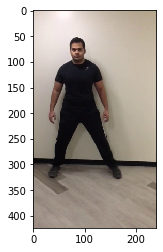

In [1191]:
SI(temp)

In [1192]:
# t1 = temp
# t2 = cv2.rectangle(t1, (250,750), (100, 300), (255,0,0), 2)


In [1193]:
temp.shape

(424, 240, 3)

In [1194]:
a = 3,2

In [1195]:
183*(30/50)

109.8

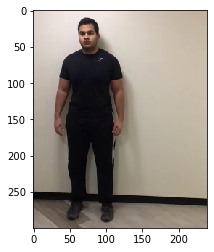

In [1196]:
SI(cv_img[0][40:340,:])

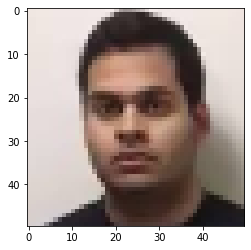

In [1197]:
SI(cv_img[0][50:100,50:100])

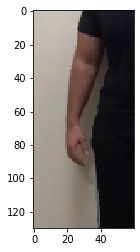

In [1198]:
SI(cv_img[0][120:250,10:70])

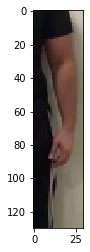

In [1199]:
SI(cv_img[0][120:250,100:130])

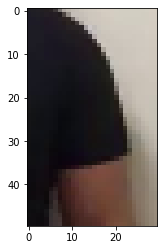

In [1200]:
SI(cv_img[0][100:150,100:130])

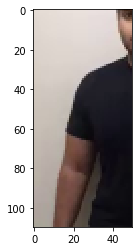

In [1201]:
SI(cv_img[0][70:180,20:70])

In [1202]:
70*(100/30)

233.33333333333334

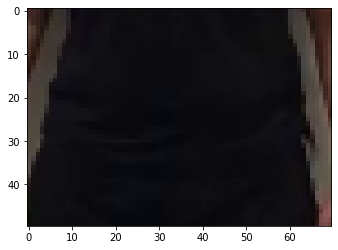

In [1203]:
SI(cv_img[0][150:200,45:115])

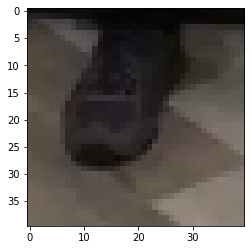

In [1204]:
SI(cv_img[0][300:340,40:80])

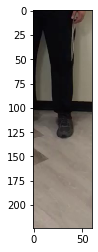

In [1205]:
SI(cv_img[0][200:450:,70:130])

In [1206]:
cv_img[0][160:200,29:69].shape

(40, 40, 3)

In [1207]:
template = img2

In [1208]:
template.shape

(12, 41, 3)

In [1209]:
round(100*(100/30))

333

# vanilla body track 

In [1215]:
import datetime      
def mean_rgb(a):
    r = np.mean(a[:,:,0])
    g = np.mean(a[:,:,1])
    b = np.mean(a[:,:,2])
    
    return r,g,b
    
def ML(array):
    a,b = np.where(array == np.nanmax(array))
    return(a[0],b[0])

def Norm_CCR_Calculate(input_image, template):
    window_size = template.shape
    ssd = np.zeros((input_image.shape[0] - window_size[0] + 1,input_image.shape[1] - window_size[1] + 1))

    w1 = template.shape[0]
    w2 = template.shape[1]

    for p in range(input_image.shape[0] - w1 + 1):
        for q in range(input_image.shape[1] - w2 + 1):
            sample = input_image[p:p+w1,q:q+w2]
            s_r,s_g,s_b = mean_rgb(sample)
            S_I = sample - np.mean(sample)
            t_r,t_g,t_b = mean_rgb(template)
            T_I = template - np.mean(template)
            A = np.multiply(S_I,T_I)
            B = np.multiply(S_I**2 , T_I**2)
            C = np.sqrt(B)
            diff = np.divide(A,C)
            ssd[p,q] += (diff).sum()
    return ssd

def check_region(L1,L2):
    if (len(L1) == 2) and (len(L2) == 2):
        a = np.array(L1)
        b = np.array(L2)
        c = np.linalg.norm(b-a)
        if c > 50:
            return L2
            
        else:
            return L1
    else:
        print('bitter')
        return 0,0

datetime_object = datetime.datetime.now()
print(datetime_object)
cv_ccr = []
# x1,x2,y1,y2 = 110,155,59,89 # face
# x1_a,x2_a,y1_a,y2_a = 160,200,29,69  # left arm
# x1_b,x2_b,y1_b,y2_b = 160,200,89,129 # right arm 
# x1_c,x2_c,y1_c,y2_c = 245,285,99,139 # right hand
# x1_d,x2_d,y1_d,y2_d = 242,282,8,49 # left hand
# x1_e,x2_e,y1_e,y2_e = 242,282,42,112 # hip
# x1_f,x2_f,y1_f,y2_f = 360,400,40,70 # left leg
# x1_g,x2_g,y1_g,y2_g = 360,400,90,130 # right leg
x1,x2,y1,y2 = 50,100,50,100 # face
x1_a,x2_a,y1_a,y2_a = 70,180,20,70 # left arm
x1_b,x2_b,y1_b,y2_b = 100,150,100,130 # right arm 
x1_c,x2_c,y1_c,y2_c = 120,250,100,130 # right hand
x1_d,x2_d,y1_d,y2_d = 120,250,10,70 # left hand
x1_e,x2_e,y1_e,y2_e = 150,200,45,115 # hip
x1_f,x2_f,y1_f,y2_f = 300,340,40,80 # left leg
x1_g,x2_g,y1_g,y2_g = 200,450,70,130 # right leg
ccr_list = []
target_region = []
template_main = cv_img[0][x1:x2,y1:y2]
template_arm_l = cv_img[0][x1_a:x2_a,y1_a:y2_a]
template_arm_r = cv_img[0][x1_b:x2_b,y1_b:y2_b]
template_hand_l = cv_img[0][x1_d:x2_d,y1_d:y2_d]
template_hand_r = cv_img[0][x1_c:x2_c,y1_c:y2_c]
template_hip = cv_img[0][x1_e:x2_e,y1_e:y2_e]
template_leg_l = cv_img[0][x1_f:x2_f,y1_f:y2_f]
template_leg_r = cv_img[0][x1_g:x2_g,y1_g:y2_g ]
flag = 1
track_list = []
start = datetime.datetime.now()
blue  = [255,0,0]
L0 = [[75,75,125,45,125,115,200,120,200,35,175,80,320,60,320,100]]
for i in range(20,60):
    n1 = datetime.datetime.now()
    img = cv_img[i]
    ccr_img = Norm_CCR_Calculate(img,template_main)
    ccr_img_a = Norm_CCR_Calculate(img,template_arm_l)
    ccr_img_b = Norm_CCR_Calculate(img,template_arm_r)
    ccr_img_c = Norm_CCR_Calculate(img,template_hand_r)
    ccr_img_d = Norm_CCR_Calculate(img,template_hand_l)
    ccr_img_e = Norm_CCR_Calculate(img,template_hip)
    ccr_img_f = Norm_CCR_Calculate(img,template_leg_l)
    ccr_img_g = Norm_CCR_Calculate(img,template_leg_r)
    x1,y1 = ML(ccr_img)
    x1 = x1 + 25
    y1 = y1 + 25
    x1,y1 = check_region([x1,y1],L0[-1:][0][0:2])
    xa,ya = ML(ccr_img_a)
    xa = xa + round((x2_a-x1_a)/2)
    ya = ya + round((y2_a-y1_a)/2)
    xa,ya = check_region([xa,ya],L0[-1:][0][2:4])
    xb,yb = ML(ccr_img_b)
    xb = xb + round((x2_b-x1_b)/2)
    yb = yb + round((y2_b-y1_b)/2)
    xb,yb = check_region([xb,yb],L0[-1:][0][4:6])
    xc,yc = ML(ccr_img_c)
    xc = xc + round((x2_c-x1_c)/2)
    yc = yc + round((y2_c-y1_c)/2)
    xc,yc = check_region([xc,yc],L0[-1:][0][6:8])
    xd,yd = ML(ccr_img_d)
    xd = xd + round((x2_d-x1_d)/2)
    yd = yd + round((y2_d-y1_d)/2)
    xd,yd = check_region([xd,yd],L0[-1:][0][8:10])
    xe,ye = ML(ccr_img_e)
    xe = xe + round((x2_e-x1_e)/2)
    ye = ye + round((y2_e-y1_e)/2)
    xe,ye = check_region([xe,ye],L0[-1:][0][10:12])
    xf,yf = ML(ccr_img_f)
    xf = xf + round((x2_f-x1_f)/2)
    yf = yf + round((y2_f-y1_f)/2)
    xf,yf = check_region([xf,yf],L0[-1:][0][12:14])
    xg,yg = ML(ccr_img_g)
    xg = xg + round((x2_g-x1_g)/2)
    yg = yg + round((y2_g-y1_g)/2)
    xg,yg = check_region([xg,yg],L0[-1:][0][14:16])
    C_R = 3
    img = cv2.circle(img,(y1, x1), C_R, (255,0,0), -1) 
    img = cv2.circle(img,(ya, xa), C_R, (255,0,0), -1)
    img = cv2.circle(img,(yb, xb), C_R, (255,0,0), -1)
    img = cv2.circle(img,(yc, xc), C_R, (255,0,0), -1)
    img = cv2.circle(img,(yd, xd), C_R, (255,0,0), -1)
    img = cv2.circle(img,(ye, xe), C_R, (255,0,0), -1)
    img = cv2.circle(img,(yf, xf), C_R, (255,0,0), -1)
    img = cv2.circle(img,(yg, xg), C_R, (255,0,0), -1)
    lineThickness = 1
#     img = cv2.line(img , (y1, x1), (ye, xe), (0,255,0), lineThickness) # head to hip
#     img = cv2.line(img , (ya, xa), (yb, xb), (0,255,0), lineThickness) # arm to arm
#     img = cv2.line(img , (ya, xa), (yd, xd), (0,255,0), lineThickness) # l arm to l hand 
#     img = cv2.line(img , (yb, xb), (yc, xc), (0,255,0), lineThickness) # r arm to r hand
#     img = cv2.line(img , (ye, xe), (yf, xf), (0,255,0), lineThickness) # hip to l leg
#     img = cv2.line(img , (ye, xe), (yg, xg), (0,255,0), lineThickness) # hip to r leg
    cv_ccr.append(img)
    n2 = datetime.datetime.now()
    print(i)
    print(n2-n1)
    L0.append([x1,y1,xa,ya,xb,yb,xc,yc,xd,yd,xe,ye,xf,yf,xg,yg])
    
    
end = datetime.datetime.now()
print('valhalla')
print(end - start)
print('done')


2019-12-05 08:54:24.942837


/anaconda3/envs/magpie/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/envs/magpie/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


20
0:01:41.876495
21
0:01:43.255042
22
0:01:43.897774


KeyboardInterrupt: 

In [1212]:
len(cv_ccr)

0

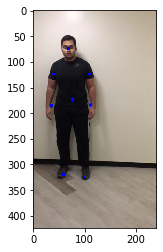

In [1216]:
SI(cv_ccr[0])

In [576]:
3 / 2

1.5

In [1217]:
from PIL import Image
ccr_path = '/Users/amitadate/Work/MSAI/332_Computer_Vision/IMGS/out_frames/'
ccr_names = []

for i in range(len(cv_ccr)):
    a = ccr_path + str(i) + '.jpg'
    ccr_names.append(a)
    cv2.imwrite(a, cv_ccr[i])
    cv2.waitKey();
    


In [1183]:
import cv2
import numpy as np
import os
from os.path import isfile, join
pathIn= ccr_path
pathOut = '/Users/amitadate/Work/MSAI/332_Computer_Vision/IMGS/out_vid/final_vid_pose_10fps.mp4'
fps = 10
frame_array = []
frame_array = []
for i in range(len(ccr_names)):
    img = cv2.imread(ccr_names[i])
    height, width, layers = img.shape
    size = (width,height)
    #inserting the frames into an image array
    frame_array.append(img)
    
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

In [866]:
l = [1,2,3,4,[1,2]]

In [890]:
l[-1:]


[[1, 2, 3, 4, 5, 6, 7, 8]]

In [878]:
l = [[1,2],[3,4],[1,2,3,4,5,6,7,8]]

In [880]:
l[-1][2:4]

[3, 4]

In [883]:
a = np.array([1,2])
b = np.array([3,4])
c = np.linalg.norm(b-a)

In [884]:
c

2.8284271247461903

In [885]:
a

array([1, 2])

In [886]:
gg,hh = a

In [892]:
yy = [[1,2],[3,4]]


In [898]:
yy[-1:][0][0:2]

[3]